In [71]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
data = pd.read_csv('housing.csv')

In [73]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [75]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


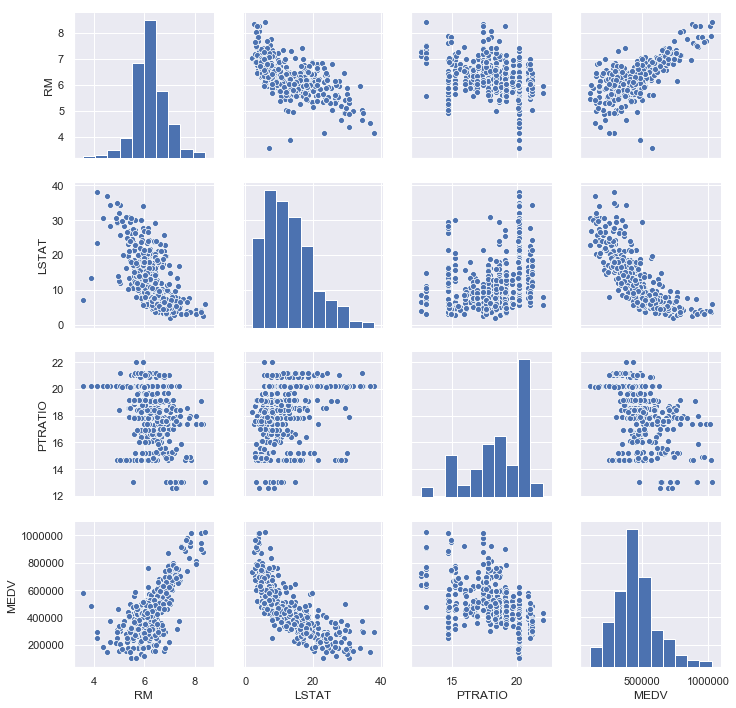

In [76]:
sns.set()
sns.pairplot(data,palette='coolwarm')

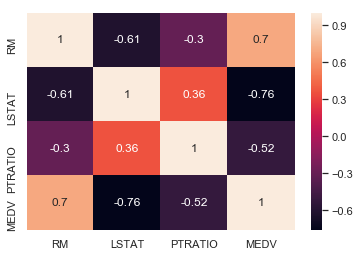

In [77]:
sns.heatmap(data.corr(),annot=True)

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


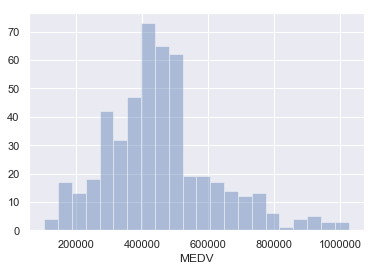

In [78]:
sns.distplot(data['MEDV'],kde=False)

In [79]:
X = data[['RM','LSTAT','PTRATIO']]

In [80]:
y = data['MEDV']

In [81]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
model.intercept_

444019.24058346834

In [84]:
model.coef_

array([ 80737.51094651, -10992.92274351, -19126.49414973])

In [85]:
y_pred = model.predict(X_test)

In [86]:
y_pred

array([565683.40112781, 436660.69192065, 431054.83461829, 389253.3173309 ,
       516507.93911361, 482983.73454917, 408697.08642834, 257784.79848964,
       307962.22407907, 354359.45629159, 492915.52431266, 722712.2798368 ,
       268779.81577156, 519794.40078029, 493623.995508  , 562286.2524424 ,
       456060.91517093, 677313.48793756, 260961.67116393, 508820.6409328 ,
       647387.92127693, 218137.16434806, 517557.03561304, 519625.15682493,
       235951.74688894, 380746.42008294, 548984.2276648 , 671504.97887436,
       339012.24448296, 578978.85608364, 535648.53448535, 388579.41648349,
       365247.44581645, 563710.11584691, 725939.98220088, 600127.42282481,
       733638.45031713, 193044.35493196, 330828.55065478, 383688.84798951,
       612448.82507056, 386619.21798801, 421429.58373345, 507539.54492878,
       688126.64629504, 441263.6545865 , 639365.18221256, 245193.94261184,
       406641.00543368, 411400.11036136, 416702.46835818, 315537.35457293,
       559026.70514802, 5

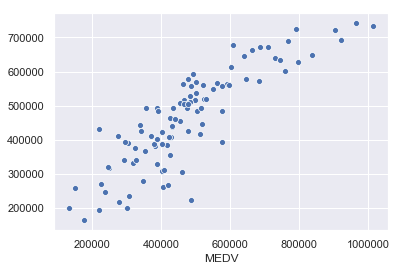

In [87]:
sns.scatterplot(y_test,y_pred)

In [88]:
#Backward Elimination for optimum results

In [89]:
#Adding a coulmn of ones as statsmodel don't do it for us. So that the equation becomes y = ax0+b1x2+b2x3+....+bnxn
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((489,1)).astype(int),values = X,axis=1)

In [90]:
X_opt = X[:,[0,1,2,3]]
X_opt

array([[ 1.   ,  6.575,  4.98 , 15.3  ],
       [ 1.   ,  6.421,  9.14 , 17.8  ],
       [ 1.   ,  7.185,  4.03 , 17.8  ],
       ...,
       [ 1.   ,  6.976,  5.64 , 21.   ],
       [ 1.   ,  6.794,  6.48 , 21.   ],
       [ 1.   ,  6.03 ,  7.88 , 21.   ]])

In [91]:
model_OLS = sm.OLS(endog=y,exog=X_opt).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.9
Date:                Tue, 25 Jun 2019   Prob (F-statistic):          9.96e-133
Time:                        23:54:46   Log-Likelihood:                -6259.9
No. Observations:                 489   AIC:                         1.253e+04
Df Residuals:                     485   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.155e+05   6.88e+04      6.035      0.000     2.8e+05    5.51e+05
x1          8.657e+04   7888.895     10.973      0.000    7.11e+04    1.02e+05
x2         -1.085e+04    732.138    -14.819      0.000   -1.23e+04   -9410.786
x3         -1.949e+04   2039.047     -9.559      0.000   -2.35e+04   -1.55e+04
==============================================================================
Omnibus:                       57.976   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.413
Skew:                           0.772   Prob(JB):                     1.41e-20
Kurtosis:                       4.451   Cond. No.                         416.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#i.e their is high correlation between all the independent variables and dependent variable

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


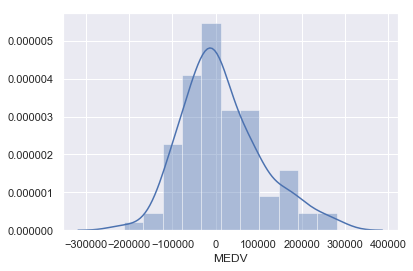

In [93]:
sns.distplot((y_test-y_pred))

In [143]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

69250.34632740813
8589286526.085735
92678.4037739415


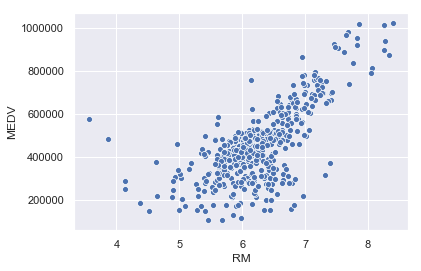

In [145]:
sns.scatterplot(data['RM'],data['MEDV'])